### Tracking and Countering Disinformation Campaigns in the Middle East and North Africa: A Data-Driven Approach

The digital age has fundamentally reshaped how individuals and communities interact and express opinions. With the proliferation of social media, voices that once confined to local conversation now echo across global digital spaces. Platforms like Twitter, serve as dynamic spaces for discourse where individuals, organizations and movement can rally around hashtags that encapsulate sentiment, campaigns and social phenomena. Analyzing these hashtags can shape over the trends and insights into public opinion, to gain a better understanding of how information spreads, how communities coalesce around shared ideas, and how emotions drive engagement during pivotal events.

This project seeks to harness the rich trove of data available of over 600,000 arabic tweets directly related to the complex interactions surrouding Egyptian politics. By utilizing a data set of such a size, this research explores the multifaced nature of political discourse in Egypt during moments of heightened social and political tensions. The considerable amounts of tweets span a diverse range of topics, including governement policies, public sentiment towards political figures, and the emergence of potential disinformation campaigns. By analyzing the structure, the language and thematics within this data set, the project the deeper currents of public sentiment and sheds light on how online narratives evolve and influence perceptions. 

The narrative begins with data preprocessing and tidying to make sure to obtain a reliable analysis of this critical topic. At the heart of the analysis, lies a multi-disciplinary approach combining Natural Language Processing (NLP) and advanced analytical techniques such as Latent Dirichlet Allocation (LDA) for topic modeling. The study investigates how public opinion is shaped, disseminated, and transformed in the digital realm. It seeks to answer critical questions: How do political events trigger specific emotional responses? What narratives dominate the conversation, and how do they intersect or conflict? Are there patterns that point to coordinated disinformation efforts, and how can they be tracked and countered?

Through this investigation, the project not only provides a detailed understanding of Egyptian political discourse but also contributes to the broader field of social media analysis. It underscores the potential of data-driven approaches to decode the dynamics of public opinion and disinformation in the Middle East, offering a framework for future research aimed at fostering transparency, countering manipulation, and empowering informed dialogue in digital spaces.


#### I - Data Preparation and Preprocessing

##### Data Overview

In [558]:
# Import all the needed libraries to complete this project

# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model evaluation and metrics
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

# Pipelines
from sklearn.pipeline import make_pipeline

In [560]:
import kagglehub
import pandas as pd
import os

#latest version of the dataset
path = kagglehub.dataset_download("hazemshokry/egypt-arabic-politics-tweets")

print("Path to dataset files:", path)

Path to dataset files: /Users/moumenalaoui/.cache/kagglehub/datasets/hazemshokry/egypt-arabic-politics-tweets/versions/1


In [570]:
#download data + combine the 6 JSON files into a single dataset
dfs = []

for file_name in os.listdir(path):
    if file_name.endswith(".json"):
        file_path = os.path.join(path, file_name)
        data = pd.read_json(file_path, lines=True)
        dfs.append(data)

#combine all dfs
data_merged = pd.concat(dfs, ignore_index=True)

print("Total rows:", data_merged.shape[0], ",Total columns:", data_merged.shape[1])
data_merged.head()

Total rows: 602974 ,Total columns: 3


,_id,_source,sort
0,AW048KW-WtPoMHvPzsAu,"{'sentiment': 'NEGATIVE', 'hashtags': [], 'cre...",[1568618350000]
1,AW048KklWtPoMHvPzsAv,"{'sentiment': 'NEUTRAL', 'hashtags': [], 'crea...",[1568618352000]
2,AW048KmYWtPoMHvPzsAw,"{'sentiment': 'NEGATIVE', 'hashtags': ['كفاية_...",[1568618353000]
3,AW048RpzWtPoMHvPzsAy,"{'sentiment': 'NEGATIVE', 'hashtags': ['كفايه_...",[1568618378000]
4,AW048RpzWtPoMHvPzsAz,"{'sentiment': 'NEGATIVE', 'hashtags': ['كفايه_...",[1568618378000]


- The Dataframe, shown as a table contains 602 974 rows, where each row represents an individual tweet associated with its metadata. 

##### Data Preprocessing

In [572]:
#extract '_source' 
df = data_merged
df['_sentiment'] = df['_source'].apply(lambda x: x['sentiment'])
df['_hashtags'] = df['_source'].apply(lambda x: x.get('hashtags', []))
df['_created_at'] = df['_source'].apply(lambda x: x.get('created_at', None))

#updated df
df[['_id', 'sort', '_sentiment', '_hashtags', '_created_at']]

,_id,sort,_sentiment,_hashtags,_created_at
0,AW048KW-WtPoMHvPzsAu,[1568618350000],NEGATIVE,[],2019-09-16T07:19:10Z
1,AW048KklWtPoMHvPzsAv,[1568618352000],NEUTRAL,[],2019-09-16T07:19:12Z
2,AW048KmYWtPoMHvPzsAw,[1568618353000],NEGATIVE,[كفاية_بقي_ياسيسي],2019-09-16T07:19:13Z
3,AW048RpzWtPoMHvPzsAy,[1568618378000],NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16T07:19:38Z
4,AW048RpzWtPoMHvPzsAz,[1568618378000],NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16T07:19:38Z
...,...,...,...,...,...
602969,AW07rD-QWtPoMHvP1Joe,[1568664126000],NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16T20:02:06Z
602970,AW07rD0qWtPoMHvP1JoN,[1568664126000],NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16T20:02:06Z
602971,AW07rD0qWtPoMHvP1JoR,[1568664126000],NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16T20:02:06Z
602972,AW07rD37WtPoMHvP1JoS,[1568664126000],NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16T20:02:06Z


- Extract and organize essential fields form the dataframe's '_source' column. The goal is to isolate key attributes (sentiments, hashtags and creation time) for a streamlined analysis.

##### Updated Structure:

A new data dataframe is created with the following columns:
- _id : Refers to the users id.
- sort: indexing or unique identifier of the tweet
- _sentiment: Extracted sentiment value.
- _hashtags: Extracted hashtags as lists.
- _created_at: Extracted creation timestamps.

In [574]:
#missing values??  + drop irrelevent cols for analysis
print(df.isnull().sum()) 

df = df.drop(columns=['_source'])
df = df.drop(columns=['sort'])

df.head()

_id            1275
_source           0
sort              0
_sentiment        0
_hashtags         0
_created_at       0
dtype: int64


,_id,_sentiment,_hashtags,_created_at
0,AW048KW-WtPoMHvPzsAu,NEGATIVE,[],2019-09-16T07:19:10Z
1,AW048KklWtPoMHvPzsAv,NEUTRAL,[],2019-09-16T07:19:12Z
2,AW048KmYWtPoMHvPzsAw,NEGATIVE,[كفاية_بقي_ياسيسي],2019-09-16T07:19:13Z
3,AW048RpzWtPoMHvPzsAy,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16T07:19:38Z
4,AW048RpzWtPoMHvPzsAz,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16T07:19:38Z


- Identifying and handling missing values.

- Dropping unnecessary columns that do not contribute to the analysis.

In [576]:
#convert timestamp col
df['timestamp'] = pd.to_datetime(df['_created_at'])

df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

#drop _created_at
df = df.drop(columns=['_created_at'])

In [578]:
#empty hashtag?? -> drop
df = df[df['_hashtags'].apply(lambda x: len(x) > 0)]

df.shape

(489624, 7)

- Updated dataset contains 489624 rows and 7 columns

In [580]:
df.head()

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week
2,AW048KmYWtPoMHvPzsAw,NEGATIVE,[كفاية_بقي_ياسيسي],2019-09-16 07:19:13+00:00,2019-09-16,7,Monday
3,AW048RpzWtPoMHvPzsAy,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:38+00:00,2019-09-16,7,Monday
4,AW048RpzWtPoMHvPzsAz,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:38+00:00,2019-09-16,7,Monday
5,AW048RpzWtPoMHvPzsAx,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:38+00:00,2019-09-16,7,Monday
6,AW048RszWtPoMHvPzsA1,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:39+00:00,2019-09-16,7,Monday


##### Timestamp Conversion and Feature Extraction

- Section dedicated to handle timestamps in the data set, converting them into a useable format with temporal features (date, hour, day of the week) which is essential for temporal analysis, such as identifying trends or patterns based on time.

In [582]:
#sentiment distribution
df['_sentiment'].value_counts().plot(kind='bar')
sentiment_counts = df['_sentiment'].value_counts()
sentiment_counts

_sentiment
NEGATIVE          428962
NEUTRAL            58618
NOT_UNDERSTOOD      1033
VERY_NEGATIVE        542
POSITIVE             466
VERY_POSITIVE          3
Name: count, dtype: int64

##### Sentiment distribution 

- The result provide a breakdown of sentiment counts, allowing for an understanding of the dataset's overall sentiment composition.

- The majority tweets express a negative sentiment (428,962 tweets), followed by neutral semtiemnt (58,618 tweets)

- Positive sentiment are much less frequent : "POSITIVE" - 466 tweets and "VERY POSITIVE" - 3 tweets only.

##### INTERPRETATION:

- The dominance of negative sentiment indicates a critical tone in the tweets, most likely reflecting public dissatisfaction about a certain polictical issue or event.

- The sentiment breakdown is crucial for understanding the overall mood of the dataset and guiding further analysis.


#### II - Sentiment Analysis with a BERT pre-trained model

##### 1. Pre-processing

In [584]:
# 1. preprocessing

#(no warnings)
df = df.copy()  

sentiment_mapping = {
    'NEGATIVE': 0,
    'VERY_NEGATIVE': 0,
    'NEUTRAL': 1,
    'POSITIVE': 2,
    'VERY_POSITIVE': 2,
    'NOT_UNDERSTOOD': -1
}

df['label'] = df['_sentiment'].map(sentiment_mapping)

#exclude not understood vals
df = df[df['label'] != -1]

In [592]:
df.sample(10)

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label
59996,AW05h7quWtPoMHvPz6qR,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 10:04:13+00:00,2019-09-16,10,Monday,0
593292,AW07pC4SWtPoMHvP1HRQ,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 19:54:00+00:00,2019-09-16,19,Monday,0
191429,AW06rSJsWtPoMHvP0av-,NEGATIVE,[كفاية_بقي_ياسيسي],2019-09-16 15:24:45+00:00,2019-09-16,15,Monday,0
557061,AW07hHYZWtPoMHvP0-bJ,NEGATIVE,"[محمد_علي, كفايه_بقي_ياسيسي]",2019-09-16 19:19:53+00:00,2019-09-16,19,Monday,0
348661,AW08Kj0bWtPoMHvP1pZT,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 22:05:24+00:00,2019-09-16,22,Monday,0
60803,AW05iQNDWtPoMHvPz621,NEGATIVE,[شعبك_مصدقك_ياسيسي],2019-09-16 10:05:37+00:00,2019-09-16,10,Monday,0
82022,AW05q18AWtPoMHvP0ACd,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 10:43:08+00:00,2019-09-16,10,Monday,0
296191,AW07-_F4WtPoMHvP1cln,NEGATIVE,[كفاية_بقي_ياسيسي],2019-09-16 21:28:50+00:00,2019-09-16,21,Monday,0
341239,AW08I3gcWtPoMHvP1nlL,NEUTRAL,[كفايه_بقي_ياسيسي],2019-09-16 21:59:49+00:00,2019-09-16,21,Monday,1
602245,AW07q5oNWtPoMHvP1Jc6,NEGATIVE,[كفاية_بقي_ياسيسي],2019-09-16 20:01:31+00:00,2019-09-16,20,Monday,0


- mapping sentiment labels to numeric values for compatibility with the model:
    - Negative = 0
    - Neutral = 1
    - Positive = 2

In [600]:
print(df['label'].unique(), df['_sentiment'].unique())

[0 1 2] ['NEGATIVE' 'NEUTRAL' 'VERY_NEGATIVE' 'POSITIVE' 'VERY_POSITIVE']


In [620]:
#sampled df for comp efficiency
sample_df = df.sample(n=1000, random_state=42)
sample_df.head()

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label
354087,AW08Lt09WtPoMHvP1qt4,NEGATIVE,"[هنكمل_مشوارنا_معاك_ياسيسي, مليون_ريتويت_دعم_ل...",2019-09-16 22:09:39+00:00,2019-09-16,22,Monday,0
9506,AW05FSWyWtPoMHvPzuVS,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:59:04+00:00,2019-09-16,7,Monday,0
420335,AW06t6hNWtPoMHvP0dCk,NEGATIVE,"[ارحل_يا_سيسي, كفايه_بقى_يا_سيسي]",2019-09-16 15:36:10+00:00,2019-09-16,15,Monday,0
451061,AW063pffWtPoMHvP0kis,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 16:18:43+00:00,2019-09-16,16,Monday,0
502450,AW07HpxNWtPoMHvP0xFs,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 17:28:35+00:00,2019-09-16,17,Monday,0


- Created a sample dataset of 1000 random rows for training and testing data for computational efficiency as BERT model are very computational expensive. Processing a whole data set of half a million rows would approxiemately take a couple days.

In [622]:
#convert hash list -> str 
sample_df['_hashtags'] = sample_df['_hashtags'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

#preprocess arabic txt
from camel_tools.utils.dediac import dediac_ar
from camel_tools.utils.normalize import normalize_unicode

def preprocess_arabic(text):
    text = normalize_unicode(text)
    text = dediac_ar(text)
    return text

sample_df['_hashtags'] = sample_df['_hashtags'].apply(preprocess_arabic)

#txt + labels
texts = sample_df['_hashtags'].tolist()
labels = sample_df['label'].tolist()

In [624]:
sample_df.head()

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label
354087,AW08Lt09WtPoMHvP1qt4,NEGATIVE,هنكمل_مشوارنا_معاك_ياسيسي مليون_ريتويت_دعم_للسيسى,2019-09-16 22:09:39+00:00,2019-09-16,22,Monday,0
9506,AW05FSWyWtPoMHvPzuVS,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 07:59:04+00:00,2019-09-16,7,Monday,0
420335,AW06t6hNWtPoMHvP0dCk,NEGATIVE,ارحل_يا_سيسي كفايه_بقى_يا_سيسي,2019-09-16 15:36:10+00:00,2019-09-16,15,Monday,0
451061,AW063pffWtPoMHvP0kis,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 16:18:43+00:00,2019-09-16,16,Monday,0
502450,AW07HpxNWtPoMHvP0xFs,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 17:28:35+00:00,2019-09-16,17,Monday,0


- converted the column containing hashtags from list of strings to a column of raw strings and normalized Arabic text to feed proper data types to the BERT model.

In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = sample_df['_hashtags']
y = sample_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Data Splitting

- Split the data into training and testing sets (80% training, 20% testing).

In [28]:
from transformers import BertTokenizer, BertForSequenceClassification

#tokenizer + model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2) #labels = 2

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [29]:
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer

#tokenize
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

#train + test datasets
train_dataset = SentimentDataset(X_train, y_train, tokenizer, max_len=128)
test_dataset = SentimentDataset(X_test, y_test, tokenizer, max_len=128)

#train + test data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [30]:
from transformers import AdamW
import torch
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
import os

#tokenizer parallelism off
os.environ["TOKENIZERS_PARALLELISM"] = "false"


sample_df['label'] = sample_df['label'].astype(int)  #labels == integers
valid_labels = [0, 1] 
sample_df = sample_df[sample_df['label'].isin(valid_labels)]

#dataloader update??
train_loader = DataLoader(
    SentimentDataset(X_train, y_train, tokenizer, max_len=128),
    batch_size=16, shuffle=True
)

#optimizer + loss
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)  # Use PyTorch AdamW
loss_fn = CrossEntropyLoss()

#GPU??
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

#train loop #3 epoch
for epoch in range(3):
    model.train()
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        try:
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels) #forward
            loss = outputs.loss
            logits = outputs.logits

            optimizer.zero_grad() #backward
            loss.backward()
            optimizer.step()

            loop.set_description(f'Epoch {epoch}') #progess bar
            loop.set_postfix(loss=loss.item())
        except Exception as e:
            print(f"Error processing batch: {e}")

Epoch 0:  54%|███████████▉          | 27/50 [03:21<02:37,  6.83s/it, loss=0.378]

Error processing batch: Target 2 is out of bounds.


Epoch 0:  98%|█████████████████████▌| 49/50 [06:06<00:08,  8.06s/it, loss=0.248]

Error processing batch: Target 2 is out of bounds.


  0%|                                                    | 0/50 [00:00<?, ?it/s]

Error processing batch: Target 2 is out of bounds.


Epoch 1:  38%|███████▉             | 19/50 [02:16<03:49,  7.42s/it, loss=0.0631]

Error processing batch: Target 2 is out of bounds.


  0%|                                                    | 0/50 [00:00<?, ?it/s]

Error processing batch: Target 2 is out of bounds.


Epoch 2:  68%|██████████████▉       | 34/50 [03:51<01:42,  6.43s/it, loss=0.524]

Error processing batch: Target 2 is out of bounds.


Epoch 2: 100%|██████████████████████| 50/50 [05:36<00:00,  6.73s/it, loss=0.506]


##### Model Selection and Training

- Used a pre-trained BERT Model for binary sentiment classification
- Training loop optimized the model using AdamW with a learning rate of 2e-5 and CrossEntropyLoss.
- Implemented a custom PyTorch dataset class to tokenize and handle the data.

In [31]:
from sklearn.metrics import accuracy_score

model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, axis=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

#acc
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.915


##### Evaluation 1

- Accuracy: 91.5% on the test set.

In [32]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [33]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
#same process again
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from tqdm import tqdm
from accelerate import Accelerator
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
num_labels = 2
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)

sample_df = sample_df[sample_df['label'].isin([0, 1])]

X_train, X_test, y_train, y_test = train_test_split(sample_df['_hashtags'], sample_df['label'], test_size=0.2, random_state=42)

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

max_len = 128
batch_size = 16

train_dataset = SentimentDataset(X_train, y_train, tokenizer, max_len)
test_dataset = SentimentDataset(X_test, y_test, tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

accelerator = Accelerator(mixed_precision="fp16")

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(accelerator.device)
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

model, optimizer, train_loader = accelerator.prepare(model, optimizer, train_loader)

epochs = 3
for epoch in range(epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        accelerator.backward(loss)
        optimizer.step()

        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())

model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(accelerator.device)
        attention_mask = batch['attention_mask'].to(accelerator.device)
        labels = batch['labels'].to(accelerator.device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, axis=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy}')
print(classification_report(true_labels, predictions))

cm = confusion_matrix(true_labels, predictions)
print(f"Confusion Matrix:\n{cm}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 2: 100%|██████████████████████| 50/50 [04:33<00:00,  5.46s/it, loss=0.273]


Accuracy: 0.915
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       183
           1       0.00      0.00      0.00        17

    accuracy                           0.92       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.84      0.92      0.87       200

Confusion Matrix:
[[183   0]
 [ 17   0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### Evaluation 2

- Accuracy of 91.5% on the test set

- Classification report:
  - Precision, Recall, F1-Score for Negative Sentiment (0): High values, indicating the model effectively identifies negative tweets.
  - Precision, Recall, F1-Score for Negative Sentiment (1): Low values, indicating the model an imbalance with the training data.

- Confusion Matrix -> next chunk


##### INTERPRETATION

- Model overall accuracy (91.5%) is very impressive, but may be disleading due to an imbalance of positive tweets in the dataset. Most tweets are negative and the model may simply default to predicting the big majority class.

- The dataset is heavily skewed toward negative tweets. Out of the 1000 samples, only a very few were labeled as positive or very positive which explains why the model struggles to classify positive sentiment.

- Precision, Recall, F1-Score for positive sentiment is 0, which means that the model likely didn't receive enough examples of the positive class during training which makes sense due to the nature of the dataset.\

- The confusion matrix further highlights the imbalance issue. The model never predicts "positive" indicating that the training data or loss function may need adjustment to handle minority classes better.

In [468]:
###### saving results

In [35]:
model.save_pretrained("saved_model_path")
tokenizer.save_pretrained("saved_model_path")

('saved_model_path/tokenizer_config.json',
 'saved_model_path/special_tokens_map.json',
 'saved_model_path/vocab.txt',
 'saved_model_path/added_tokens.json')

##### 1. Confusion Matrix

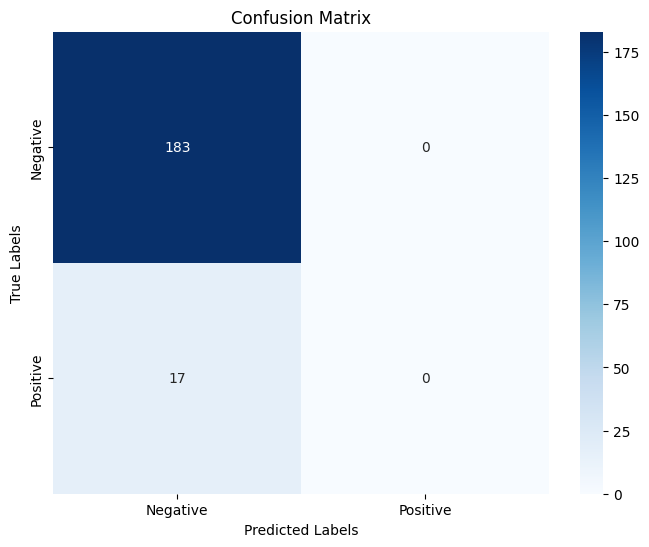

In [336]:
from sklearn.metrics import confusion_matrix

class_names = ['Negative', 'Positive']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### INTERPRETATION 

- True Negatives - 183: correctly predicted negative tweets.
- False Negatives - 17: misclassified positive tweets that were predicted as negative.
- True Positives - 0: No tweets were correctly classified as positive
- False Positives - 0: No tweets were incorrectly classified as positive.



- The model overwhelmingly predicts the majority class ("Negative") due to dataset imbalance.
- It completely fails to classify "Positive" tweets, likely because the training set does not provide enough examples for this class.

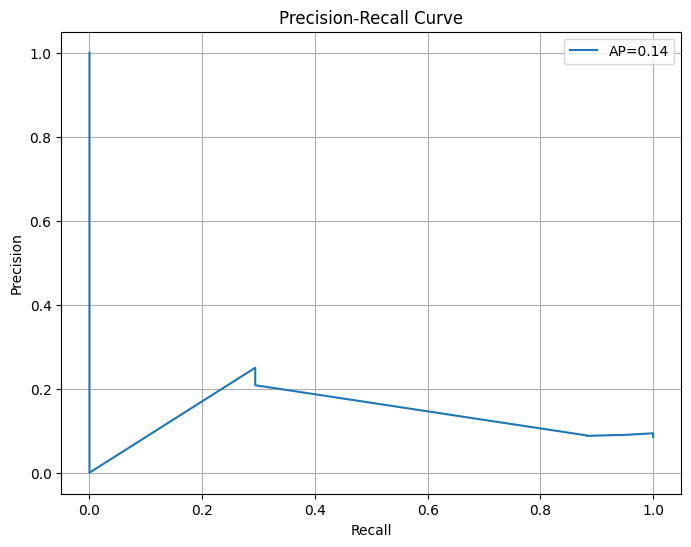

In [338]:
from sklearn.metrics import precision_recall_curve, average_precision_score

#probs
probabilities = []
true_labels = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        probabilities.extend(torch.softmax(logits, dim=1)[:, 1].cpu().numpy())  # Probability of Positive class
        true_labels.extend(labels.cpu().numpy())

#precision-recall 
precision, recall, thresholds = precision_recall_curve(true_labels, probabilities)
average_precision = average_precision_score(true_labels, probabilities)

#precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP={average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


- Average Precision (AP = 0.14)
    - A low AP score indicates poor performance in distinguishing between classes, especially for minority classes - positive.

- Key Observations:
    - The model struggles to balance precision and recall, particularly for the "Positive" class.
  - This is expected given the severe class imbalance in the dataset.

/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_2932/588837173.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


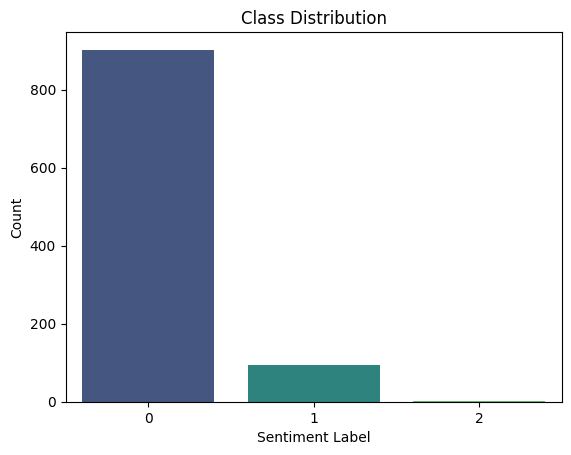

In [346]:
class_counts = sample_df['label'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

#### III - Visualisation + NLP + LDA 

1. Big Data visualisation and analysis

Top 10 Hashtags:
كفايه_بقي_ياسيسي             384259
كفاية_بقي_ياسيسي              75570
هنكمل_مشوارنا_معاك_ياسيسي     16860
ارحل_يا_سيسي                  15512
السيسي                         9183
ارحل_ياسيسي                    6978
محمد_علي                       5687
مصر                            3663
عدي_المليون                    3313
كفايه_بقى_يا_سيسي              2781
Name: count, dtype: int64


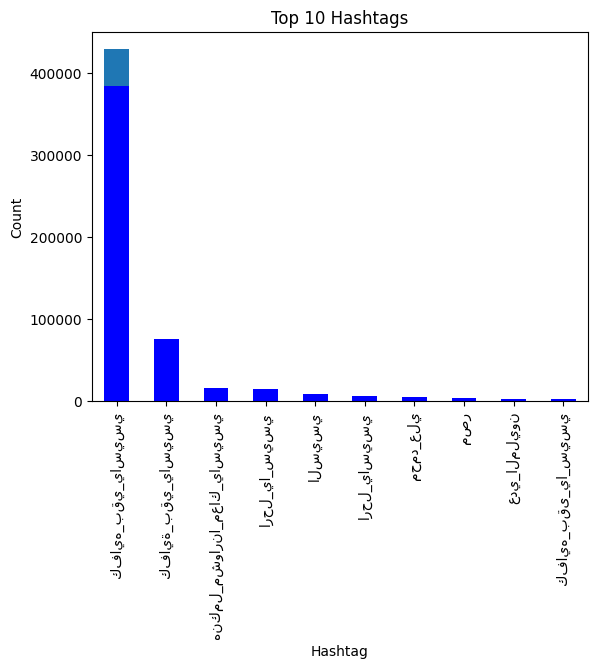

In [628]:
hashtags = [hashtag for tags in df['_hashtags'] for hashtag in tags]
hashtag_counts = pd.Series(hashtags).value_counts()

#top 10 hashtags
print("Top 10 Hashtags:")
print(hashtag_counts.head(10))

hashtag_counts.head(10).plot(kind='bar', color='blue')
plt.title("Top 10 Hashtags")
plt.xlabel("Hashtag")
plt.ylabel("Count")
plt.show()

##### Hashtag Distribution

- The most common hashtag is "كفاية_بقى_ياسيسي" (384,800 occurrences), indicating a strong theme likely tied to dissatisfaction with the leadership of Abdel Fattah el-Sisi.

- Other frequent hashtags include "ارحل_يا_سيسي" and "منكمل_مش_وارنا_معاك_يا_سيسي," which also appear to reflect critical public sentiment towards Abdel Fattah el-Sisi. Let's break them down.

##### INTERPRETATION:

1. كفاية_بقى_ياسيسي ("#EnoughAlreadySisi"):
    - Translation: The hashtag translates to a direct expression of frustration or dissatisfaction, with the phrase "Enough already, Sisi."
      
    - Sentiment representation: It represents a strong public dissatisfaction agaisnt the leadership of Abdel Fattah el-Sisi, suggesting that people feel discontent with his policies, actions, or the current state of governance.
  
    - Contextual Interpretation: The pharse "كفاية_بقى" (Enough already) implies that the people have been enduring enough and are calling for change , whether in leadership, policies, or governance.
  
2. "ارحل_يا_سيسي" ("#LeaveSisi"):
   - Translation: The hashtag translate to the expression "Leave Sisi", which is a direct demand for Abdel Fattah el-Sisi to resign from his position as President of Egypt.
  
   - Sentiment representation: The hashtag reflects a strong dissafraction with el-Sisi leadership and represents a collective frustration among segments of the population who seek a change in leadership.
  
   -  Contextual Interpretation: The hashtag is most likely associated organized protests or political campaigns advocating for systemic change or the removal of a sitting leader. It may have surfaced during a time of economic or political crisis, public unrest, or widespread discontent with specific government actions.


3.  "منكمل_مش_وارنا_معاك_يا_سيسي," ("#WeAreNotContinuingWithYouSisi"):
   - Refers to the same issue addressed with the previous 2 hashtags.

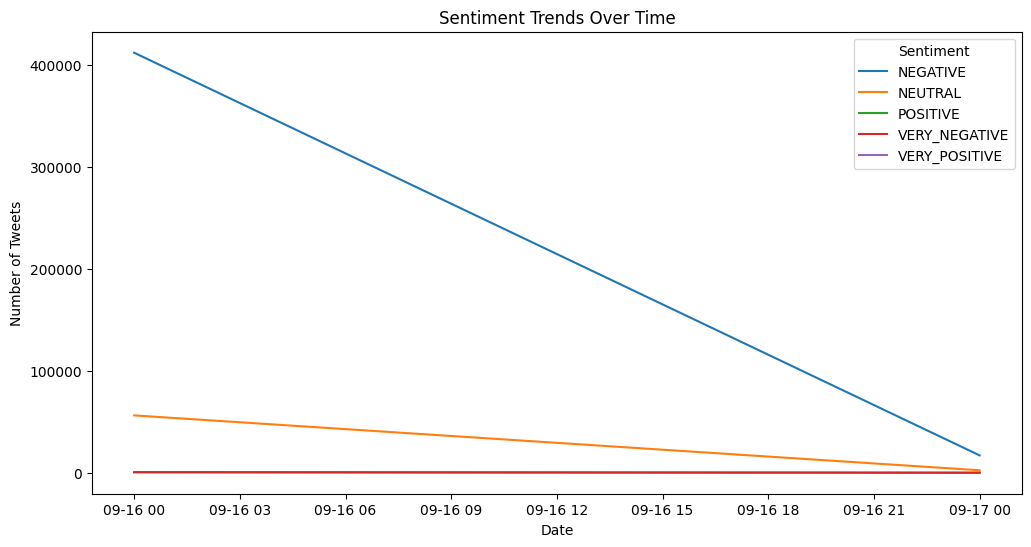

In [630]:
sentiment_trends = df.groupby([df['date'], '_sentiment']).size().unstack()
sentiment_trends.plot(kind='line', figsize=(12, 6))
plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.show()

##### Interpretation of the Sentiment Trends Over Time Chart

We notice :

- Dominance of negative sentiment
- Decline in volume over time
- Minimal positive sentiment
- Neutral Sentiment Trends
- Possible external factors (that shifted the public attention resulting in a decrease in twitter activity)

#### Work on an analysis on a subset dataframe of 1000 values 

In [632]:
sample_df

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label
354087,AW08Lt09WtPoMHvP1qt4,NEGATIVE,هنكمل_مشوارنا_معاك_ياسيسي مليون_ريتويت_دعم_للسيسى,2019-09-16 22:09:39+00:00,2019-09-16,22,Monday,0
9506,AW05FSWyWtPoMHvPzuVS,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 07:59:04+00:00,2019-09-16,7,Monday,0
420335,AW06t6hNWtPoMHvP0dCk,NEGATIVE,ارحل_يا_سيسي كفايه_بقى_يا_سيسي,2019-09-16 15:36:10+00:00,2019-09-16,15,Monday,0
451061,AW063pffWtPoMHvP0kis,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 16:18:43+00:00,2019-09-16,16,Monday,0
502450,AW07HpxNWtPoMHvP0xFs,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 17:28:35+00:00,2019-09-16,17,Monday,0
...,...,...,...,...,...,...,...,...
378194,AW08Yd_UWtPoMHvP1wmu,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 23:21:16+00:00,2019-09-16,23,Monday,0
548659,AW07fBpBWtPoMHvP08X5,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 19:10:45+00:00,2019-09-16,19,Monday,0
297079,AW07_MY0WtPoMHvP1czM,NEGATIVE,كفايه_بقى_يا_سيسي ارحل_يا_سيسي,2019-09-16 21:29:26+00:00,2019-09-16,21,Monday,0
219447,AW07rPS6WtPoMHvP1J14,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 20:02:51+00:00,2019-09-16,20,Monday,0


In [634]:
sample_df['timestamp'] = pd.to_datetime(sample_df['timestamp'])
sample_df['date'] = sample_df['timestamp'].dt.date

daily_sentiment = (
    sample_df.groupby(['date', 'label']).size().unstack(fill_value=0)
)

if len(daily_sentiment.columns) == 2:
    daily_sentiment.columns = ['Negative', 'Positive']

daily_sentiment.reset_index(inplace=True)

print("Sentiment count", daily_sentiment)

Sentiment count label        date    0   1  2
0      2019-09-16  871  93  3
1      2019-09-17   31   2  0


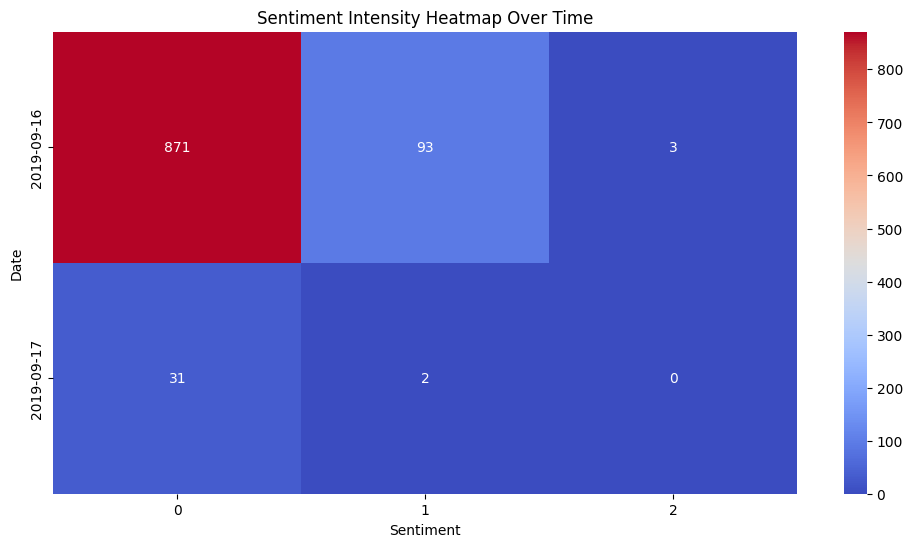

In [636]:
#heatmap
heatmap_data = daily_sentiment.set_index('date')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', cbar=True)
plt.title("Sentiment Intensity Heatmap Over Time")
plt.xlabel("Sentiment")
plt.ylabel("Date")
plt.show()

In [638]:
sample_df

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label
354087,AW08Lt09WtPoMHvP1qt4,NEGATIVE,هنكمل_مشوارنا_معاك_ياسيسي مليون_ريتويت_دعم_للسيسى,2019-09-16 22:09:39+00:00,2019-09-16,22,Monday,0
9506,AW05FSWyWtPoMHvPzuVS,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 07:59:04+00:00,2019-09-16,7,Monday,0
420335,AW06t6hNWtPoMHvP0dCk,NEGATIVE,ارحل_يا_سيسي كفايه_بقى_يا_سيسي,2019-09-16 15:36:10+00:00,2019-09-16,15,Monday,0
451061,AW063pffWtPoMHvP0kis,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 16:18:43+00:00,2019-09-16,16,Monday,0
502450,AW07HpxNWtPoMHvP0xFs,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 17:28:35+00:00,2019-09-16,17,Monday,0
...,...,...,...,...,...,...,...,...
378194,AW08Yd_UWtPoMHvP1wmu,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 23:21:16+00:00,2019-09-16,23,Monday,0
548659,AW07fBpBWtPoMHvP08X5,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 19:10:45+00:00,2019-09-16,19,Monday,0
297079,AW07_MY0WtPoMHvP1czM,NEGATIVE,كفايه_بقى_يا_سيسي ارحل_يا_سيسي,2019-09-16 21:29:26+00:00,2019-09-16,21,Monday,0
219447,AW07rPS6WtPoMHvP1J14,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 20:02:51+00:00,2019-09-16,20,Monday,0


### NLP Analysis
1. Normalization

In [640]:
#1. Normalization

import re

def normalize_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"[^a-zA-Z0-9_أ-ي]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

sample_df['_hashtags'] = sample_df['_hashtags'].apply(normalize_text)

In [642]:
sample_df.head()

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label
354087,AW08Lt09WtPoMHvP1qt4,NEGATIVE,هنكمل_مشوارنا_معاك_ياسيسي مليون_ريتويت_دعم_للسيسى,2019-09-16 22:09:39+00:00,2019-09-16,22,Monday,0
9506,AW05FSWyWtPoMHvPzuVS,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 07:59:04+00:00,2019-09-16,7,Monday,0
420335,AW06t6hNWtPoMHvP0dCk,NEGATIVE,ارحل_يا_سيسي كفايه_بقى_يا_سيسي,2019-09-16 15:36:10+00:00,2019-09-16,15,Monday,0
451061,AW063pffWtPoMHvP0kis,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 16:18:43+00:00,2019-09-16,16,Monday,0
502450,AW07HpxNWtPoMHvP0xFs,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 17:28:35+00:00,2019-09-16,17,Monday,0


2. Tokenization

In [644]:
#2. Tokenization
#Modules
import re
from nltk.corpus import stopwords
import string
import nltk

nltk.download('stopwords')

#preprocessing 
def preprocess_arabic_hashtags(hashtags):
    arabic_stop_words = set(stopwords.words('arabic') + list(string.punctuation))
    if isinstance(hashtags, str):
        tokens = re.split(r'\s|[_#]', hashtags)
    elif isinstance(hashtags, list):
        tokens = [re.split(r'\s|[_#]', tag) for tag in hashtags]
        tokens = [item for sublist in tokens for item in sublist]
    else:
        return []

    clean_tokens = [word for word in tokens if word.isalnum() and word not in arabic_stop_words]
    return clean_tokens

sample_df['tokenized_hashtags'] = sample_df['_hashtags'].apply(preprocess_arabic_hashtags)

sample_df[['tokenized_hashtags']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/moumenalaoui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokenized_hashtags
354087,"[هنكمل, مشوارنا, معاك, ياسيسي, مليون, ريتويت, ..."
9506,"[كفايه, بقي, ياسيسي]"
420335,"[ارحل, سيسي, كفايه, بقى, سيسي]"
451061,"[كفايه, بقي, ياسيسي]"
502450,"[كفايه, بقي, ياسيسي]"


In [646]:
sample_df.head()

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label,tokenized_hashtags
354087,AW08Lt09WtPoMHvP1qt4,NEGATIVE,هنكمل_مشوارنا_معاك_ياسيسي مليون_ريتويت_دعم_للسيسى,2019-09-16 22:09:39+00:00,2019-09-16,22,Monday,0,"[هنكمل, مشوارنا, معاك, ياسيسي, مليون, ريتويت, ..."
9506,AW05FSWyWtPoMHvPzuVS,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 07:59:04+00:00,2019-09-16,7,Monday,0,"[كفايه, بقي, ياسيسي]"
420335,AW06t6hNWtPoMHvP0dCk,NEGATIVE,ارحل_يا_سيسي كفايه_بقى_يا_سيسي,2019-09-16 15:36:10+00:00,2019-09-16,15,Monday,0,"[ارحل, سيسي, كفايه, بقى, سيسي]"
451061,AW063pffWtPoMHvP0kis,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 16:18:43+00:00,2019-09-16,16,Monday,0,"[كفايه, بقي, ياسيسي]"
502450,AW07HpxNWtPoMHvP0xFs,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 17:28:35+00:00,2019-09-16,17,Monday,0,"[كفايه, بقي, ياسيسي]"


3. Stop-word removal

In [648]:
stop_words = set(stopwords.words('english') + stopwords.words('arabic'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

sample_df['cleaned_tokens'] = sample_df['tokenized_hashtags'].apply(remove_stopwords)
sample_df.head()

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label,tokenized_hashtags,cleaned_tokens
354087,AW08Lt09WtPoMHvP1qt4,NEGATIVE,هنكمل_مشوارنا_معاك_ياسيسي مليون_ريتويت_دعم_للسيسى,2019-09-16 22:09:39+00:00,2019-09-16,22,Monday,0,"[هنكمل, مشوارنا, معاك, ياسيسي, مليون, ريتويت, ...","[هنكمل, مشوارنا, معاك, ياسيسي, مليون, ريتويت, ..."
9506,AW05FSWyWtPoMHvPzuVS,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 07:59:04+00:00,2019-09-16,7,Monday,0,"[كفايه, بقي, ياسيسي]","[كفايه, بقي, ياسيسي]"
420335,AW06t6hNWtPoMHvP0dCk,NEGATIVE,ارحل_يا_سيسي كفايه_بقى_يا_سيسي,2019-09-16 15:36:10+00:00,2019-09-16,15,Monday,0,"[ارحل, سيسي, كفايه, بقى, سيسي]","[ارحل, سيسي, كفايه, بقى, سيسي]"
451061,AW063pffWtPoMHvP0kis,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 16:18:43+00:00,2019-09-16,16,Monday,0,"[كفايه, بقي, ياسيسي]","[كفايه, بقي, ياسيسي]"
502450,AW07HpxNWtPoMHvP0xFs,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 17:28:35+00:00,2019-09-16,17,Monday,0,"[كفايه, بقي, ياسيسي]","[كفايه, بقي, ياسيسي]"


4. Stemming

In [650]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("arabic")

def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

sample_df['stemmed_tokens'] = sample_df['cleaned_tokens'].apply(stem_tokens)
sample_df.head()

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label,tokenized_hashtags,cleaned_tokens,stemmed_tokens
354087,AW08Lt09WtPoMHvP1qt4,NEGATIVE,هنكمل_مشوارنا_معاك_ياسيسي مليون_ريتويت_دعم_للسيسى,2019-09-16 22:09:39+00:00,2019-09-16,22,Monday,0,"[هنكمل, مشوارنا, معاك, ياسيسي, مليون, ريتويت, ...","[هنكمل, مشوارنا, معاك, ياسيسي, مليون, ريتويت, ...","[هنكمل, مشوار, معا, ياسيس, مليو, ريتو, دعم, سيسى]"
9506,AW05FSWyWtPoMHvPzuVS,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 07:59:04+00:00,2019-09-16,7,Monday,0,"[كفايه, بقي, ياسيسي]","[كفايه, بقي, ياسيسي]","[كفا, بق, ياسيس]"
420335,AW06t6hNWtPoMHvP0dCk,NEGATIVE,ارحل_يا_سيسي كفايه_بقى_يا_سيسي,2019-09-16 15:36:10+00:00,2019-09-16,15,Monday,0,"[ارحل, سيسي, كفايه, بقى, سيسي]","[ارحل, سيسي, كفايه, بقى, سيسي]","[ارحل, سيس, كفا, بقى, سيس]"
451061,AW063pffWtPoMHvP0kis,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 16:18:43+00:00,2019-09-16,16,Monday,0,"[كفايه, بقي, ياسيسي]","[كفايه, بقي, ياسيسي]","[كفا, بق, ياسيس]"
502450,AW07HpxNWtPoMHvP0xFs,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 17:28:35+00:00,2019-09-16,17,Monday,0,"[كفايه, بقي, ياسيسي]","[كفايه, بقي, ياسيسي]","[كفا, بق, ياسيس]"


- Data set has been normalized, tokenized, stemmed and removed stop-words. Ready for advanced techniques like NLP and LDA.

  - Natural language processing (NLP): Field of AI that focuses on enabling machines to understand, interpret, and interact with human language.
 
  - Latent Dirichlet Allocation (LDA): Unsupervised machine learning algorithm used for topic modeling.

##### 1. NLP

In [652]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]  #punctuation
    stop_words = set(stopwords.words('arabic'))  #sw
    tokens = [word for word in tokens if word.lower() not in stop_words]  #remove sw
    return ' '.join(tokens)

sample_df['processed_text'] = sample_df['cleaned_tokens'].apply(lambda x: preprocess_text(' '.join(x)))

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(sample_df['processed_text'])

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(sample_df['processed_text'])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, sample_df['_sentiment'], test_size=0.2, random_state=42)

#RF classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/moumenalaoui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/moumenalaoui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.91
              precision    recall  f1-score   support

    NEGATIVE       0.91      0.99      0.95       183
     NEUTRAL       0.00      0.00      0.00        16
    POSITIVE       0.00      0.00      0.00         1

    accuracy                           0.91       200
   macro avg       0.30      0.33      0.32       200
weighted avg       0.84      0.91      0.87       200



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### INTREPRETATION

- 91% of the predictions made by the model were correct overall.

Top 10 Most Common Words:
ياسيسي: 996
بقي: 944
كفايه: 811
كفاية: 146
ارحل: 64
سيسي: 59
هنكمل: 34
مشوارنا: 34
معاك: 34
محمد: 32


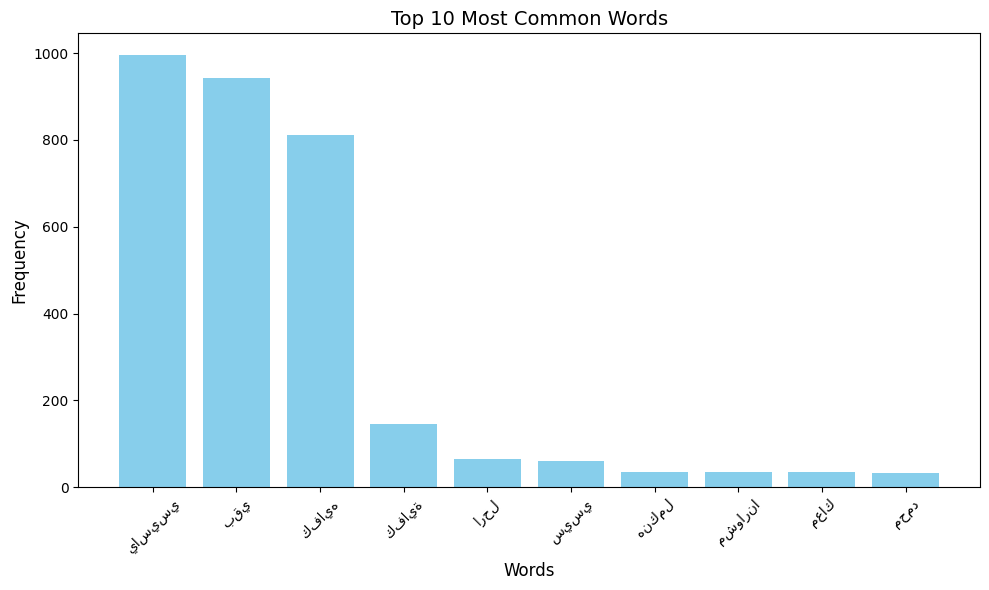

In [654]:
from collections import Counter

flattened_tokens = [token for tokens_list in sample_df['cleaned_tokens'] for token in tokens_list]
word_freq = Counter(flattened_tokens)

common_words = word_freq.most_common(10)
print("Top 10 Most Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Most Common Words", fontsize=14)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

#### INTERPRETATION


#### First LDA for static topic analysis

- Focus : static topic modeling

- clear breakdown of dominant topics and their keywords.

In [659]:
from sklearn.decomposition import LatentDirichletAllocation

#LDA -> 5 topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_topics = lda.fit_transform(X_bow)

#top words/topic
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([terms[i] for i in topic.argsort()[-10:]])

Topic 0:
['علشان', 'يتضايق', 'الحرية', 'لعم', 'leave', 'btsisback', 'خليل', 'كمال', 'enough', 'sisi']
Topic 1:
['السادات', 'btsinriyadhtickets', 'ourgravityyoungjaeday', 'سي', 'حكم', 'الفرقان', 'ذكريات', 'بقي', 'ياسيسي', 'كفايه']
Topic 2:
['يفضحهم', 'كذاب', 'كداب', 'القدوسي', 'فضحهم', 'عدي', 'المليون', 'كفاية', 'بقي', 'ياسيسي']
Topic 3:
['مليون', 'دعم', 'ريتويت', 'للسيسى', 'تحيا', 'مصر', 'مشوارنا', 'معاك', 'هنكمل', 'ياسيسي']
Topic 4:
['مسعد', 'اسيا', 'السد', 'النصر', 'بقى', 'علي', 'السيسي', 'محمد', 'سيسي', 'ارحل']


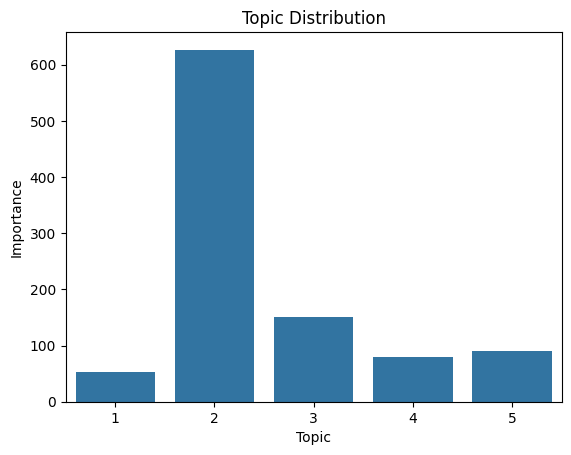

In [661]:
import seaborn as sns

sns.barplot(x=list(range(1, 6)), y=X_topics.sum(axis=0))
plt.xlabel('Topic')
plt.ylabel('Importance')
plt.title('Topic Distribution')
plt.show()

#### BREAKDOWN

1. Top words for each topic:

    - Topic 0: "leave", "enough" "sisi", "الحرية" (freedom), suggests a theme related to political unrest or protests.
  
    - Topic 1: "سي" (evil), "حكم" (govern), "الفرقان" (Al-Furqan), "ذكريات" (memories), "السادات", sugest
  
    - Topic 2: "يفضحهم" (expose them), "كذاب" (liar), "القدوسي" (Al-Qudsi), "عدي" (agressive), "المليون" (millions), "ياسيسي" (sisi), more cohesive words indicating strong political theme.
  
    - Topic 3: "ريتويت" (retweet), "تحيا" (long life), "مصر" (Egypt), "معاك" (with you), "هنكمل" (we'll continue), align with activism or political advocacy.
  
    - Topic 4: "مسعد" (Massad), "السد" (Dam), "النصر" (victory), "محمد" (Mohammed), "ارحل" leave
  
2. Topics Barplot:
  
   - Topic 2 dominates, with over 600 mentions, suggesting that the dataset is heavily centered around this topic (likely political activism or social change)
  
   -  Other topics have far fewer mentions, indicating they are either less represented or less coherent.

#### Second LDA to analyze trends over time
- connects topics with dates and tracks their evolution.

Topic 1:
['بقى', 'كمال', 'خليل', 'عدى', 'الله', 'كذاب', 'عد', 'المل', 'بق', 'كفا']


Topic 2:
['دور', 'تح', 'السد', 'نصر', 'اس', 'مصر', 'بقى', 'مشوار', 'معا', 'هنكمل']


Topic 3:
['عالم', 'سيس', 'ارحل', 'بقى', 'مصر', 'جزاير', 'ذكر', 'sisi', 'بق', 'كفا']


Topic 4:
['يفضح', 'كداب', 'قدوس', 'فضح', 'بق', 'كفا', 'عل', 'محمد', 'ارحل', 'سيس']


Topic 5:
['جزاير', 'ارحل', 'مصر', 'سيس', 'بقى', 'sisi', 'ذكر', 'بق', 'كفا', 'فرق']




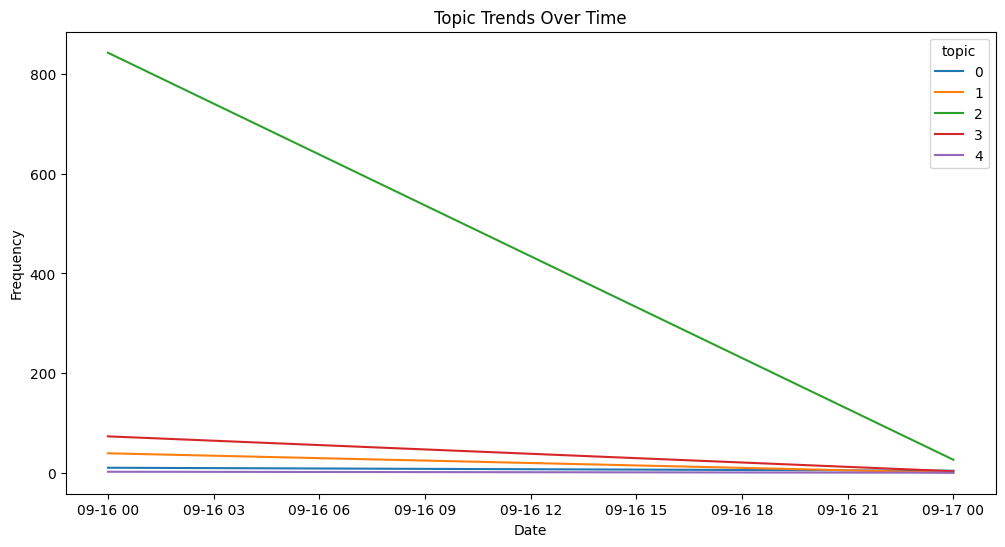

In [663]:
#same process
sample_df['tokens_text'] = sample_df['stemmed_tokens'].apply(lambda x: ' '.join(x))

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(sample_df['tokens_text'])

num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print([words[i] for i in topic.argsort()[-10:]])
    print("\n")

sample_df['topic'] = lda.transform(dtm).argmax(axis=1)
topic_trends = sample_df.groupby(['date', 'topic']).size().unstack(fill_value=0)
topic_trends.plot(figsize=(12, 6), title='Topic Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

#### BREAKDOWN

1. Top words for each topic:

    - Topic 1: "كمال" (Kamal), "خليل" (Khalil), "الله" (Allah), "كذاب" (liar),
  
    - Topic 2: "السد" (Dam), "نصر" (victory), "مصر" (Egypt), "هنكمل" (we will continue),
  
    - Topic 3: "sisi", "ارحل" (leave), "جزاير" (Algeria), "مصر" (Egypt),
  
    - Topic 4: "يفضح" (expose), "كذاب" (liar), "محمد" (Mohammed), "ارحل" (leave)
  
    - Topic 5: same as topic 4
  
2. We notice that the topic amnalysis is very similar to the topic analysis for the first LDA which confirms the interpretation.

In [667]:
topic_distributions = lda.transform(dtm)
sample_df['dominant_topic'] = topic_distributions.argmax(axis=1)
sample_df['topic_probability'] = topic_distributions.max(axis=1)

In [669]:
sample_df.head()

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label,tokenized_hashtags,cleaned_tokens,stemmed_tokens,processed_text,tokens_text,topic,dominant_topic,topic_probability
354087,AW08Lt09WtPoMHvP1qt4,NEGATIVE,هنكمل_مشوارنا_معاك_ياسيسي مليون_ريتويت_دعم_للسيسى,2019-09-16 22:09:39+00:00,2019-09-16,22,Monday,0,"[هنكمل, مشوارنا, معاك, ياسيسي, مليون, ريتويت, ...","[هنكمل, مشوارنا, معاك, ياسيسي, مليون, ريتويت, ...","[هنكمل, مشوار, معا, ياسيس, مليو, ريتو, دعم, سيسى]",هنكمل مشوارنا معاك ياسيسي مليون ريتويت دعم للسيسى,هنكمل مشوار معا ياسيس مليو ريتو دعم سيسى,1,1,0.799996
9506,AW05FSWyWtPoMHvPzuVS,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 07:59:04+00:00,2019-09-16,7,Monday,0,"[كفايه, بقي, ياسيسي]","[كفايه, بقي, ياسيسي]","[كفا, بق, ياسيس]",كفايه بقي ياسيسي,كفا بق ياسيس,2,2,0.732159
420335,AW06t6hNWtPoMHvP0dCk,NEGATIVE,ارحل_يا_سيسي كفايه_بقى_يا_سيسي,2019-09-16 15:36:10+00:00,2019-09-16,15,Monday,0,"[ارحل, سيسي, كفايه, بقى, سيسي]","[ارحل, سيسي, كفايه, بقى, سيسي]","[ارحل, سيس, كفا, بقى, سيس]",ارحل سيسي كفايه بقى سيسي,ارحل سيس كفا بقى سيس,3,3,0.694986
451061,AW063pffWtPoMHvP0kis,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 16:18:43+00:00,2019-09-16,16,Monday,0,"[كفايه, بقي, ياسيسي]","[كفايه, بقي, ياسيسي]","[كفا, بق, ياسيس]",كفايه بقي ياسيسي,كفا بق ياسيس,2,2,0.732159
502450,AW07HpxNWtPoMHvP0xFs,NEGATIVE,كفايه_بقي_ياسيسي,2019-09-16 17:28:35+00:00,2019-09-16,17,Monday,0,"[كفايه, بقي, ياسيسي]","[كفايه, بقي, ياسيسي]","[كفا, بق, ياسيس]",كفايه بقي ياسيسي,كفا بق ياسيس,2,2,0.732159


In [671]:
topic_sentiment = sample_df.groupby(['dominant_topic', 'label']).size().unstack(fill_value=0)
topic_sentiment.columns = ['Negative', 'Positive', 'Neutral']
topic_sentiment['Total'] = topic_sentiment.sum(axis=1)
print(topic_sentiment)

                Negative  Positive  Neutral  Total
dominant_topic                                    
0                     14         0        0     14
1                     32         7        0     39
2                    781        85        3    869
3                     73         3        0     76
4                      2         0        0      2


In [675]:
topic_labels = {
    0: "Political Criticism",
    1: "Pro-Government Sentiment",
    2: "Protests and Movements",
    3: "Media and Public Figures",
    4: "International Relations"
}
sample_df['topic_label'] = sample_df['dominant_topic'].map(topic_labels)
sample_df[['cleaned_tokens', 'dominant_topic', 'topic_label']].head()

,cleaned_tokens,dominant_topic,topic_label
354087,"[هنكمل, مشوارنا, معاك, ياسيسي, مليون, ريتويت, ...",1,Pro-Government Sentiment
9506,"[كفايه, بقي, ياسيسي]",2,Protests and Movements
420335,"[ارحل, سيسي, كفايه, بقى, سيسي]",3,Media and Public Figures
451061,"[كفايه, بقي, ياسيسي]",2,Protests and Movements
502450,"[كفايه, بقي, ياسيسي]",2,Protests and Movements


In [214]:
topic_group_analysis = sample_df.groupby(['day_of_week', 'dominant_topic']).size().unstack(fill_value=0)
topic_group_analysis

dominant_topic,0,1,2,3,4
day_of_week,,,,,
Monday,10,39,843,73,2
Tuesday,4,0,26,3,0


In [677]:
print(f"Max timestamp: {df['timestamp'].max()}")
print(f"Min timestamp: {df['timestamp'].min()}")
print(f"Time range in days: {(df['timestamp'].max() - df['timestamp'].min()).days}")


Max timestamp: 2019-09-17 00:31:24+00:00
Min timestamp: 2019-09-16 07:19:13+00:00
Time range in days: 0


In [679]:
time_span = df['timestamp'].max() - df['timestamp'].min()
print(f"Time Span: {time_span}")

Time Span: 0 days 17:12:11


- Data set only shows tweets between 2019-09-16 07:19:13 and 019-09-17 00:31:24 so time frame = 17:12:11

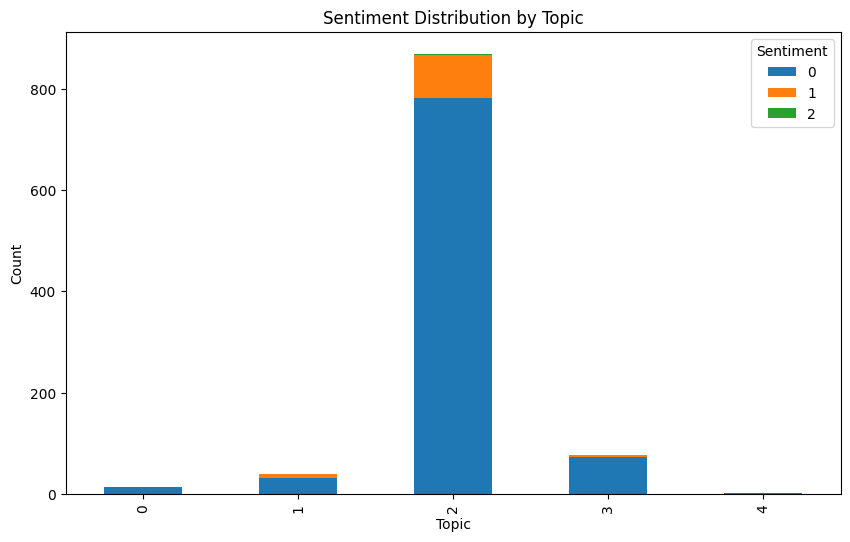

In [682]:
#predicted topics 
sample_df['topic'] = sample_df['tokens_text'].apply(lambda x: lda.transform(vectorizer.transform([x])).argmax())

#group by sentiment
sentiment_distribution = sample_df.groupby(['topic', 'label']).size().unstack(fill_value=0)

sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Distribution by Topic")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()

#### Network Analysis

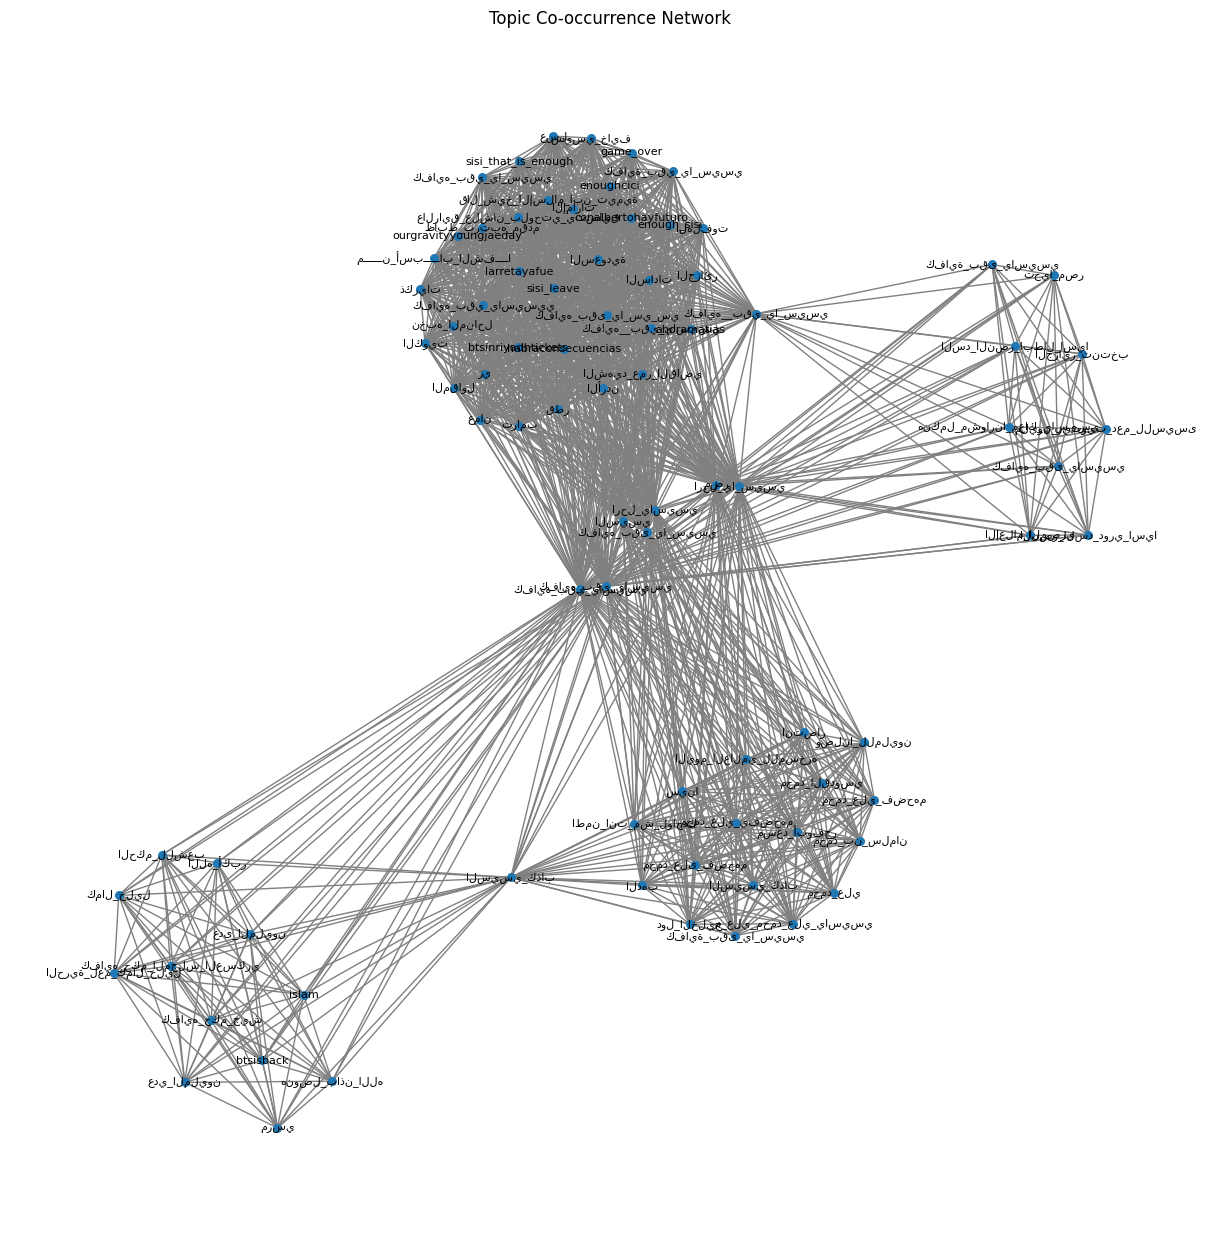

In [218]:
from itertools import combinations
import networkx as nx

#extract hash/topic
topic_hashtags = sample_df.groupby('topic')['_hashtags'].apply(lambda x: ' '.join(x).split())

#edges 
edges = []
for hashtags in topic_hashtags:
    edges.extend(combinations(set(hashtags), 2))  # Create edges for pairs of hashtags

#network
G = nx.Graph()
G.add_edges_from(edges)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=30, font_size=8, edge_color='gray')
plt.title("Topic Co-occurrence Network")
plt.show()

The network analysis is broken by:

- Nodes:
  - Each node represents a unique entity in the dataset, such as words, phrases, or hashtags.
 
- Edges:
  - Edges (lines) between nodes represent co-occurrence relationships, meaning two entities frequently appear together in the same document, tweet, or text block.
 
- Clusters:
  - Or communities, which represents groups of densely connected node.
 
- Central Nodes:
  - Represents entities that have many connections (edges) to other nodes. They act as "hubs" in the network.
 
#### INTERPRETATION


- We notice that they are 4 main clusters, indicating differenet topics
- The connections between clusters suggest that some terms or hashtags act as bridges between topics, linking otherwise distinct themes.

- **Top Cluster:** The group seems very dense and msot likely targets the unsatisfaction with Abdel Fattah el-sisi policy as we can see with redundant words like enough sisi...
  - Abdel Fattah el sisi is an Egyptian politician and retired military officer who has been serving as the sixth and current president of Egypt since 2014. The mention of his name in the dataset reflects political opposition and protests against his policy. some prominence could include:
    - **Political Repression:**
      - El-Sisi's government has been accused of cracking down on dissent and political opposition.
      - Arrests of activists, journalists, and political opponents are common themes in criticism against his regime.
      - The suppression of protests and freedom of expression often leads to widespread public dissatisfaction, especially among activists like **Kamal Khalil.**
    - **Controversial Rise to Power:**
      - El-Sisi came to power after leading a military coup in 2013 that ousted Egypt’s first democratically elected president, **Mohamed Morsi.**
      - His rise to power and the crackdown on Morsi supporters, particularly members of the **Muslim Brotherhood**, remain a significant source of contention.
    - **Economic Challenges:**
      - El-Sisi has launched large-scale infrastructure projects but they often have been criticized for:
        - Neglecting the immediate needs of ordinary Egyptians (e.g., poverty, unemployment).
        - Worsening economic inequality and placing a heavier burden on the poor.
        - High inflation, subsidy cuts, and increasing debt levels have further fueled discontent.
    - **Authoritarian Governance**:
      - Critics accuse El-Sisi of consolidating power by amending the constitution to extend presidential terms and weaken judicial independence.
      - Elections under his leadership have been criticized as undemocratic, with reports of intimidation and lack of meaningful opposition.
    - **Human Rights Violations:**
      - His government has faced widespread criticism for human rights abuses, including:
        - **The Rabaa Massacre (2013), where hundreds of protesters were killed.**
        - Torture and extrajudicial killings reported by rights organizations.
        - Targeting LGBTQ+ individuals and restricting women's rights activists.
   
    - **Regional and Global Criticism:**
      - Some view him as a strongman supported by international allies (e.g., **Saudi Arabia**, UAE, and the US) to maintain regional stability, which angers critics who see him as a puppet of foreign powers.

- **Bottom Right Cluster:** The second densest and it most likely indicates a distinct subtheme with internal cohesion with words like Mohammed Ben Salmane
  - Mohammed Ben Salmane as the Crown Prince of Saudi Arabia, is a prominent political figure associated with discussions around reforms, diplomacy, and regional politics.
  - His heavy presence most likely represents his involvement across differenet themes like:
    - Regional alliances (e.g., Arab politics, Gulf diplomacy).
    - Reforms and modernization (e.g., Vision 2030).
    - Controversies (e.g., Khashoggi case, human rights discussions).

- **Bottom Left Cluster:** Most likely represnet another subgroup or subtopic within the data, with words like Kamal Khalil and Islam
  - Kamal Khalil is an Egyptian political activist, known for his involvement in advocating for democracy, human rights, and opposing authoritarian regimes.
    - His presence might suggest :
      - Protests or social movements (e.g., anti-regime campaigns).
      - Advocacy for workers’ rights or public demonstrations.
     
- **Top Right Cluster**: Very similar to top cluster critizing el-sisi policy.

#### IV - Disinformation campaigns detection

In [684]:
df

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label
2,AW048KmYWtPoMHvPzsAw,NEGATIVE,[كفاية_بقي_ياسيسي],2019-09-16 07:19:13+00:00,2019-09-16,7,Monday,0
3,AW048RpzWtPoMHvPzsAy,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:38+00:00,2019-09-16,7,Monday,0
4,AW048RpzWtPoMHvPzsAz,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:38+00:00,2019-09-16,7,Monday,0
5,AW048RpzWtPoMHvPzsAx,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:38+00:00,2019-09-16,7,Monday,0
6,AW048RszWtPoMHvPzsA1,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:39+00:00,2019-09-16,7,Monday,0
...,...,...,...,...,...,...,...,...
602969,AW07rD-QWtPoMHvP1Joe,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 20:02:06+00:00,2019-09-16,20,Monday,0
602970,AW07rD0qWtPoMHvP1JoN,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 20:02:06+00:00,2019-09-16,20,Monday,0
602971,AW07rD0qWtPoMHvP1JoR,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 20:02:06+00:00,2019-09-16,20,Monday,0
602972,AW07rD37WtPoMHvP1JoS,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 20:02:06+00:00,2019-09-16,20,Monday,0


In [686]:
unique_ids = df['_id'].nunique()
print("Number of unique IDs in the '_id' column:", unique_ids)

Number of unique IDs in the '_id' column: 487719


In [688]:
#duplicates
duplicate_hashtags = df['_hashtags'].value_counts()

#more than once??
repeated_hashtags = duplicate_hashtags[duplicate_hashtags > 1]
print("Repeated Hashtags:")
print(repeated_hashtags)

Repeated Hashtags:
_hashtags
[كفايه_بقي_ياسيسي]                                           349259
[كفاية_بقي_ياسيسي]                                            51874
[هنكمل_مشوارنا_معاك_ياسيسي]                                   13743
[السيسي]                                                       4218
[كفاية_بقي_ياسيسي, ارحل_يا_سيسي]                               3313
                                                              ...  
[Egypt, NoMilRule, scafgate]                                      2
[مصر, أرحل, كفاية_بقى_ياسيسي, ارحل_يا_سيسي]                       2
[Really_enough_sissy, كفاية_بقي_ياسيسي, كفايه_بقى_ياسيسي]         2
[عاجل, TeNTV]                                                     2
[كفاية_ظلم, كفايه_بقي_ياسيسي]                                     2
Name: count, Length: 2532, dtype: int64


- Top hashtag: "كفاية_بقى_ياسيسي" with 349,259 occurrences, which translates to "Enough, Sisi."

- The repeated hashtags indicate major themes or topics dominating the dataset, such as calls for political reform, protests, or dissatisfaction with El-Sisi.

In [277]:
G = nx.Graph()
for hashtags in df['_hashtags']:
    for pair in combinations(hashtags, 2):
        if G.has_edge(pair[0], pair[1]):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(pair[0], pair[1], weight=1)

#centrality
degree_centrality = nx.degree_centrality(G)
print("Top Hashtags by Centrality:")
top_hashtags = sorted(degree_centrality.items(), key=lambda x: -x[1])[:10]
print(top_hashtags)

Top Hashtags by Centrality:
[('كفايه_بقي_ياسيسي', 0.48717948717948717), ('كفاية_بقي_ياسيسي', 0.33270794246404), ('ارحل_يا_سيسي', 0.18230143839899937), ('السيسي', 0.09099437148217636), ('هنكمل_مشوارنا_معاك_ياسيسي', 0.08755472170106317), ('ارحل_ياسيسي', 0.08161350844277673), ('مصر', 0.05909943714821764), ('محمد_علي', 0.0565978736710444), ('كفايه_بقى_يا_سيسي', 0.05628517823639775), ('محمد_على_فضحهم', 0.04127579737335835)]


In [279]:
#bot acc
df['tweet_rate'] = df.groupby('_id')['timestamp'].transform('count') / (df['timestamp'].max() - df['timestamp'].min()).days
bot_candidates = df[df['tweet_rate'] > 10]  # Example threshold
print("Potential Bot Accounts:")
print(bot_candidates['_id'].unique())

Potential Bot Accounts:
['AW048KmYWtPoMHvPzsAw' 'AW048RpzWtPoMHvPzsAy' 'AW048RpzWtPoMHvPzsAz' ...
 'AW07rD0qWtPoMHvP1JoR' 'AW07rD37WtPoMHvP1JoS' 'AW07rD0qWtPoMHvP1JoP']


- Bot detection:
  - Accounts are flagged as potential bots if they post at a very high rate (e.g., more than 10 tweets per day).

In [293]:
#identical tweets in hashtag col
df['tweet_content'] = df['_hashtags'].apply(lambda x: ' '.join(x))  # Combine hashtags into a single string
repeated_tweets = df['tweet_content'].value_counts()

#repetitive??
repeated_tweets = repeated_tweets[repeated_tweets > 1]
print(f"Number of repetitive tweets: {len(repeated_tweets)}")
print(repeated_tweets.head(10))

Number of repetitive tweets: 2532
tweet_content
كفايه_بقي_ياسيسي                     349259
كفاية_بقي_ياسيسي                      51874
هنكمل_مشوارنا_معاك_ياسيسي             13743
السيسي                                 4218
كفاية_بقي_ياسيسي ارحل_يا_سيسي          3313
كفايه_بقي_ياسيسي كفاية_بقي_ياسيسي      2665
ارحل_يا_سيسي                           2585
كفايه_بقي_ياسيسي ارحل_يا_سيسي          2105
كفايه_بقي_ياسيسي كفايه_بقي_ياسيسي      1727
السيسي كفايه_بقي_ياسيسي                1659
Name: count, dtype: int64


- This means 2,532 unique tweets were repeated multiple times across the dataset.

- **Repetitive Tweet Themes:**
  - Anti-Sisi Hashtags: 349259 + 51874 = 401133
    - كفاية_بقى_ياسيسي" (Enough, Sisi) and similar variations dominate the list, showing a strong protest sentiment against El-Sisi.
    
    - These tweets are likely part of a coordinated campaign to amplify opposition messages.
   
  - Pro-Sisi Hashtags: 13743

    - "هنكمل_مشوارنا_معاك_ياسيسي" (We will continue our journey with you, Sisi) appears as a supportive tweet, though much less frequent than anti-Sisi tweets.
    - This shows a smaller, but still visible, presence of supporters in the dataset.

  - Neutral Content:
    - Tweets like "السيسي" (El-Sisi) may be neutral mentions or part of larger discussions.

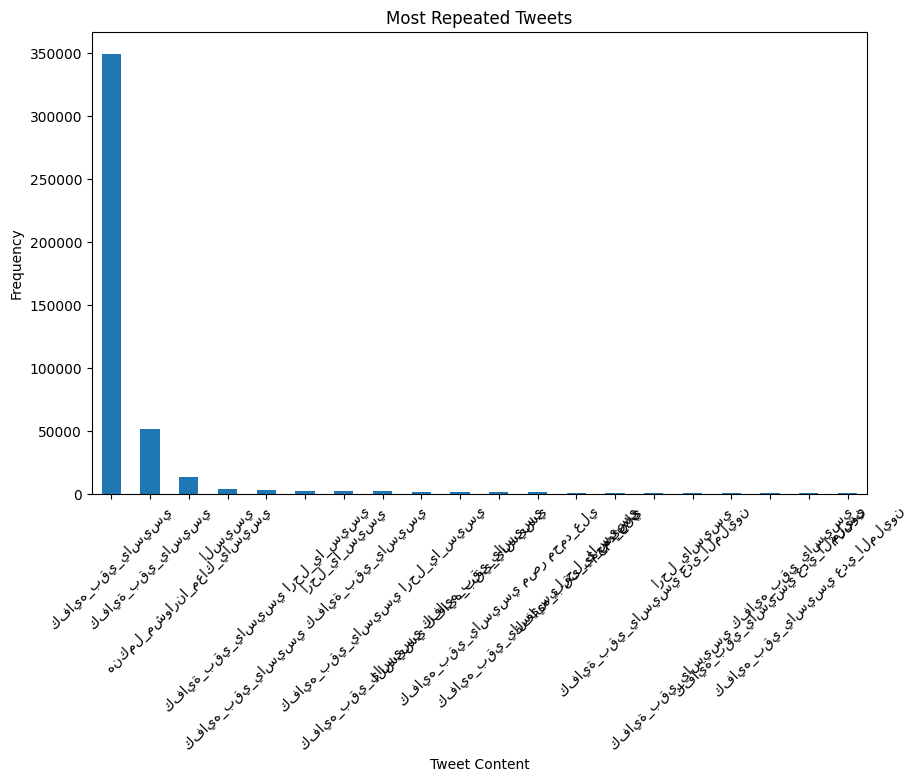

In [300]:
repeated_tweets.head(20).plot(kind='bar', figsize=(10, 6), title="Most Repeated Tweets")
plt.xlabel("Tweet Content")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

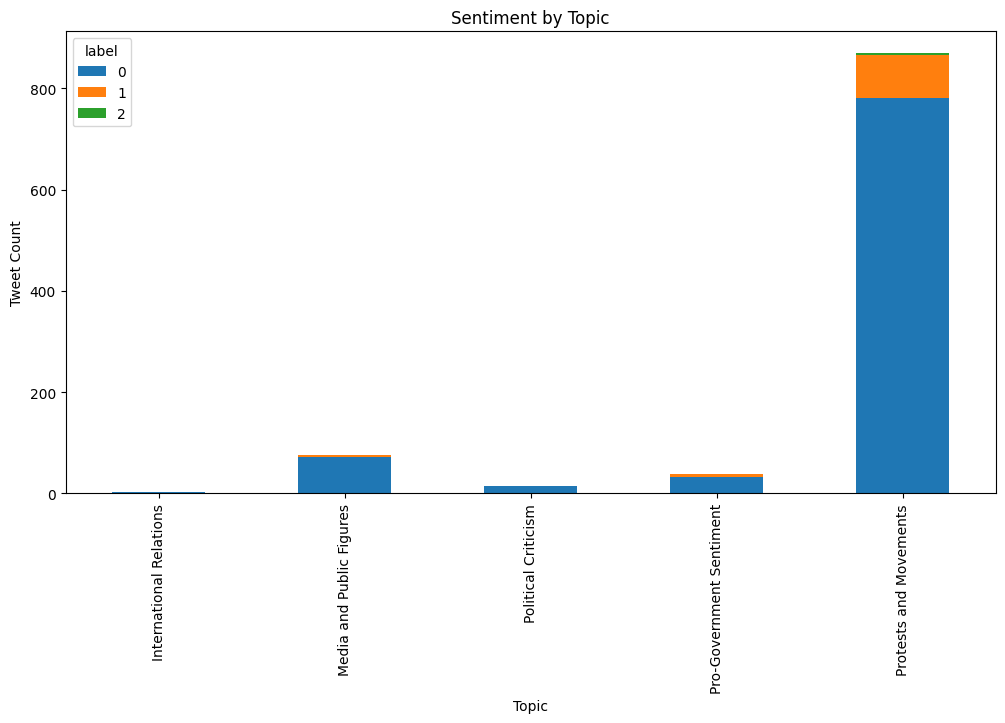

In [308]:
sentiment_by_topic = sample_df.groupby(['topic_label', 'label']).size().unstack(fill_value=0)
sentiment_by_topic.plot(kind='bar', stacked=True, figsize=(12, 6), title="Sentiment by Topic")
plt.xlabel("Topic")
plt.ylabel("Tweet Count")
plt.show()

- Protests and Movements dominates the dataset with teh highest number of tweets

- he sentiment for this topic is predominantly negative (blue), with smaller proportions of neutral (orange) and positive (green) sentiments.

- This indicates a politically charged atmosphere, where dissatisfaction with political figures, policies, and events dominates public discourse. 

In [407]:
time_span_hours = (df['timestamp'].max() - df['timestamp'].min()).total_seconds() / 3600

#/0 
if time_span_hours == 0:
    time_span_hours = 1

df['tweet_rate'] = df.groupby('_id')['timestamp'].transform('count') / time_span_hours

In [409]:
df.head()

,_id,_sentiment,_hashtags,timestamp,date,hour,day_of_week,label,original_tweet,hashtags_text,tweet_rate,tweet_content,hashtag_cluster
2,AW048KmYWtPoMHvPzsAw,NEGATIVE,[كفاية_بقي_ياسيسي],2019-09-16 07:19:13+00:00,2019-09-16,7,Monday,0,None,كفاية_بقي_ياسيسي,0.058129,كفاية_بقي_ياسيسي,1
3,AW048RpzWtPoMHvPzsAy,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:38+00:00,2019-09-16,7,Monday,0,None,كفايه_بقي_ياسيسي,0.058129,كفايه_بقي_ياسيسي,0
4,AW048RpzWtPoMHvPzsAz,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:38+00:00,2019-09-16,7,Monday,0,None,كفايه_بقي_ياسيسي,0.058129,كفايه_بقي_ياسيسي,0
5,AW048RpzWtPoMHvPzsAx,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:38+00:00,2019-09-16,7,Monday,0,None,كفايه_بقي_ياسيسي,0.058129,كفايه_بقي_ياسيسي,0
6,AW048RszWtPoMHvPzsA1,NEGATIVE,[كفايه_بقي_ياسيسي],2019-09-16 07:19:39+00:00,2019-09-16,7,Monday,0,None,كفايه_بقي_ياسيسي,0.058129,كفايه_بقي_ياسيسي,0


- Tweet rate represents the average number of tweets each user made in the same hour calculated based on the total time span of the dataset.

- Provides a normalized measeaure of activity for each user, to detect unusual activity.

In [401]:
#top 10% tweet rates
threshold = df['tweet_rate'].quantile(0.90)

#high-activity users
high_activity_users = df[df['tweet_rate'] > threshold]
print(f"Potential Bot Accounts by Tweet Rate: {high_activity_users['_id'].unique()}")

#repeated content
repeated_tweets = df['tweet_content'].value_counts()
potential_bots_repeated_content = repeated_tweets[repeated_tweets > 50]
print(f"Potential Bots by Repeated Content: {potential_bots_repeated_content.index.tolist()}")

#high-activity users + repeated content
potential_bots = df[df['_id'].isin(potential_bots_tweet_rate['_id'].unique()) | 
                    df['tweet_content'].isin(potential_bots_repeated_content.index)]
print(f"Combined Potential Bot Accounts: {potential_bots['_id'].unique()}")

Potential Bot Accounts by Tweet Rate: []
Potential Bots by Repeated Content: ['كفايه_بقي_ياسيسي', 'كفاية_بقي_ياسيسي', 'هنكمل_مشوارنا_معاك_ياسيسي', 'السيسي', 'كفاية_بقي_ياسيسي ارحل_يا_سيسي', 'كفايه_بقي_ياسيسي كفاية_بقي_ياسيسي', 'ارحل_يا_سيسي', 'كفايه_بقي_ياسيسي ارحل_يا_سيسي', 'كفايه_بقي_ياسيسي كفايه_بقي_ياسيسي', 'السيسي كفايه_بقي_ياسيسي', 'كفايه_بقي_ياسيسي مصر محمد_علي', 'كفايه_بقي_ياسيسي ارحل_ياسيسي', 'كفايه_بقى_يا_سيسي', 'محمد_علي', 'كفاية_بقي_ياسيسي عدى_المليون', 'ارحل_ياسيسي', 'كفاية_بقي_ياسيسي كفايه_بقي_ياسيسي', 'كفاية_بقي_ياسيسي عدي_المليون', 'كفايه_بقي_ياسيسي عدي_المليون', 'مرسي', 'كفايه__بقي_يا_سيسي', 'ارحل_يا_سيسي كفايه_بقي_ياسيسي', 'عدي_المليون كفايه_بقي_ياسيسي', 'ارحل_ياسيسي كفايه_بقي_ياسيسي', 'محمد_علي كفايه_بقي_ياسيسي', 'كفايه_بقي_ياسيسي رد_علي_محمد_علي_ياسيسي ارحل_يا_سيسي محمد_علي_فضحهم محمد_علي_يفضحهم محمد_القدوسي', 'محمد_علي السيسي', 'ارحل_يا_سيسي ارحل_ياسيسي كفاية_بقي_ياسيسي', 'كفاية_بقي_ياسيسي ارحل_ياسيسي', 'ارحل_يا_سيسي كفاية_بقي_ياسيسي', 'زي كفايه_بقي_ياسيسي', 'كفاية

- Accounts in the top 10% of tweet rates are flagged as high-activity users.

- Tweets repeated more than 50 times are flagged as repetitive content, which is often a sign of bot-like behavior.

#### Results

- Potential bots:
  - A list of repeated tweets and their corresponding content (hashtags, phrases). ex:
    - "كفايه_بقي_ياسيسي" ("Enough, Sisi")
    - "كفاية_بقي_ياسيسي عدي_المليون" ("Enough, Sisi - Reached the million")
    - "هنكمل_مشوارنا_معاك_ياسيسي" ("We will continue our journey with you, Sisi")
   
 - These repetitive tweets likely originate from coordinated campaigns or automated accounts.

- Accounts like : **AW048KmYWtPoMHvPzsAw, AW048RpzWtPoMHvPzsAy, AW048RpzWtPoMHvPzsAz are likely part of a coordinated effort to amplify specific messages (e.g., anti-Sisi or pro-Sisi narratives).**

### Conclusion

After analyzing over 600,000 tweets related to Egyptian political discourse, this project aimed to understand public sentiment, identify popular narratives, and detect potential bot-like accounts promoted by disinformation campaigns. Leveraging advanced Natural Language Processing (NLP) techniques combined with Latent Dirichlet Allocation (LDA), we uncovered comprehensive insights into the political landscape of Egypt during a 17-hour period, which appears to be a highly politically significant timeframe.

**Key Findings:**

- Sentiment Analysis: Using a BERT model for multilingual sentiment classification, we achieved 91.5% accuracy despite significant sentiment imbalance in the dataset. The majority of tweets expressed dissatisfaction and negative sentiment toward Abdel Fattah El-Sisi's leadership. Hashtags like "كفاية_بقى_ياسيسي" ("EnoughAlreadySisi") and "ارحل_يا_سيسي" ("LeaveSisi") were among the most frequently used, reflecting widespread public disatisfaction.

- Topic Modelling: Implemented a Latent Dirichlet Allocation allowed us to uncover dominant topics within the tweets. The analysis highlighted key topics such as calls for political change, public reactions to governement reforms and policies and discussion around protests.

- Network Analysis: Building co-occurence networks of hashtags helped identify clusters and influential nodes within the conversations and the linked between them. How some subject are highly related and how a certain subject explains certain phenomenas, potentially highlighting coordinated efforts.

- Disinformation Detection: While attempts to detect bots based on tweet rates were inconclusive due to dataset limitations (a 17-hour time span), repeated content and network patterns suggested coordinated campaigns. Identical or highly similar hashtags and phrases indicated organized efforts to amplify specific messages, whether opposing (anti-Sisi) or supporting (pro-Sisi) narratives.

**Limitations:**

- Dataset Imbalance: The huge amount of negative sentiments posed challenges for the sentiment classification model, potentially affecting its ability to accurately predict minority classes.

- Time Span: The dataset covered only a short 17-hour period, limiting the analysis of long-term trends and the effectiveness of certain detection methods, such as tweet rate-based bot identification.

- Metadata limitations: The data set lacked critical metadata (informations about users like follower count, creation dates...) which restricted deep analysis of user behavior and network analysis.

**Future directions:**

- Extend data collection: Future studies should incorporate broader datasets spanning longer timeframes and include additional metadata to provide more comprehensive insights.

- Bot detection: With richer datasets, more sophisticated algorithms and features can be used to improve the detection of automated or coordinated accounts.

**Final Thoughts:**

This project successfully demonstrated the power of combining advanced NLP techniques, machine learning algorithms, and network analysis to dissect complex political landscapes. The insights gained provide a deeper understanding of public opinion dynamics, narrative propagation, and the impact of disinformation campaigns in critical regions like the Middle East and North Africa. These findings are valuable for policymakers, researchers, and organizations aiming to monitor social discourse, counter disinformation, and understand the strategies used to manipulate public opinion.

By emphasizing the intersection of technology and social sciences, this work highlights on the importance of interdisciplinary approaches in addressing contemporary challenges. The methodologies and insights from this project provide a foundation for future research aimed at promoting transparency, enhancing digital literacy, and supporting data-driven decision-making in policy and governance.